# Task 1
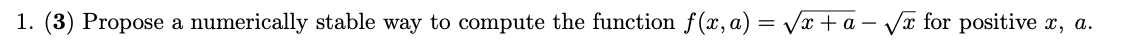

We will rationalize the expression:
f(x,a)=$(\sqrt{x+a}-\sqrt{x}) \cdot \frac{\sqrt{x+a}+\sqrt{x}}{\sqrt{x+a}+\sqrt{x}}$ 


$f(x,a) = \frac{a}{\sqrt{x+a}+\sqrt{x}}$

# Task 2
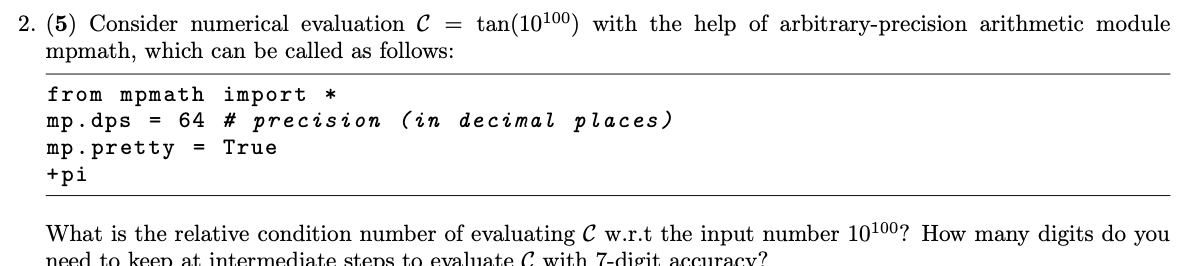

In [93]:
from mpmath import *
mp.dps = 64 
mp.pretty = True
+pi

x = mpf(10**100)
C = tan(x)
x_perturbed = x + mpf(1e-5)  
C_perturbed = tan(x_perturbed)

k = abs(C_perturbed * x / (C * x_perturbed))
print("Relative Condition Number:", k)

Relative Condition Number: 1.0


In [94]:
accuracy = 7
interm_steps = int(mp.dps + log(10, accuracy))
print("Digits needed at intermediate steps:", interm_steps)


Digits needed at intermediate steps: 65


# Task 3
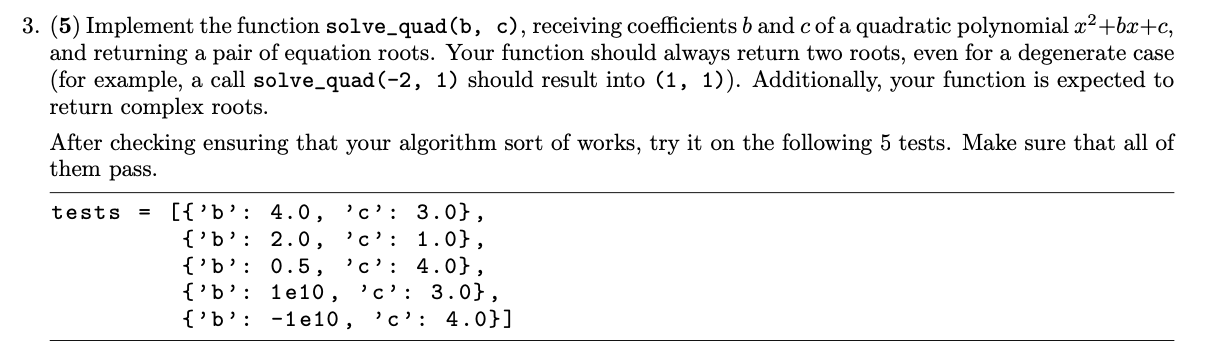

In [92]:
from mpmath import sqrt, mp

def solve_quad(b, c):
    
    mp.dps = 50 
    b = mp.mpf(b)
    c = mp.mpf(c)
    discriminant = mp.sqrt((-b)**2 - 4*c)
    root1 = (-b + discriminant) / 2
    root2 = (-b - discriminant) / 2
    return root1, root2

tests = [
    {'b': 4.0, 'c': 3.0},
    {'b': 2.0, 'c': 1.0},
    {'b': 0.5, 'c': 4.0},
    {'b': 1e10, 'c': 3.0},
    {'b': -1e10, 'c': 4.0}]

for test in tests:
    b = test['b']
    c = test['c']
    roots = solve_quad(b, c)
    print("b = ", b, ",c = ", c,",roots = ",roots)


b =  4.0 ,c =  3.0 ,roots =  (-1.0, -3.0)
b =  2.0 ,c =  1.0 ,roots =  (-1.0, -1.0)
b =  0.5 ,c =  4.0 ,roots =  ((-0.25 + 1.9843134832984429428762118152294453192826943873118j), (-0.25 - 1.9843134832984429428762118152294453192826943873118j))
b =  10000000000.0 ,c =  3.0 ,roots =  (-0.00000000030000000000000000000900000000000412272913910488466, -9999999999.999999999699999999999999999991)
b =  -10000000000.0 ,c =  4.0 ,roots =  (9999999999.999999999599999999999999999984, 0.00000000040000000000000000001599999999999737351123397653706)


# Task 4
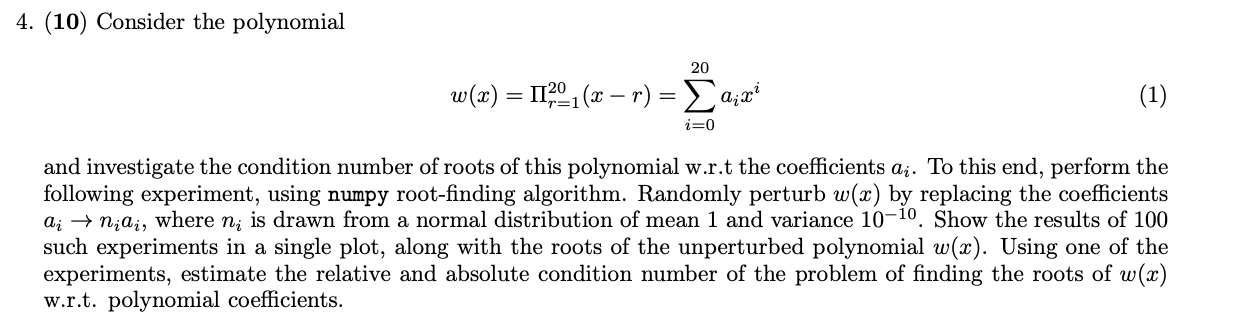

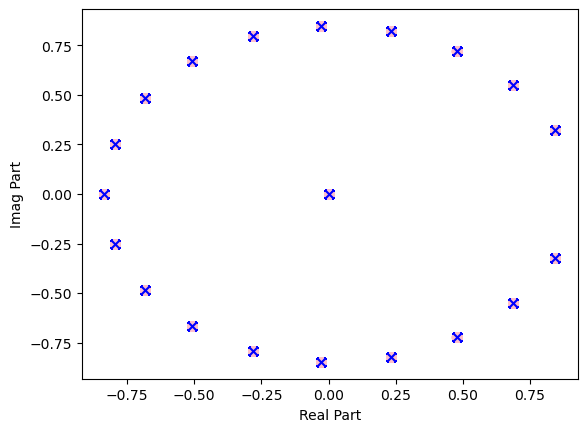

Relative Condition Number: 0.037696459612339514
Absolute Condition Number: 0.029149167322664114


In [91]:
import numpy as np
import matplotlib.pyplot as plt

n_experiments = 100
variance = 10e-10 
count = 20

def prep(variance, count):
    noise = np.random.normal(1, np.sqrt(variance), count + 1)
    coeff = np.arange(count, -1, -1)
    coeff_with_noise = coeff * noise 
    return noise, coeff, coeff_with_noise


for _ in range(n_experiments):
    noise, coeff, coeff_with_noise = prep(variance, count)
    roots = np.roots(np.poly1d(coeff))
    roots_noise = np.roots(np.poly1d(coeff_with_noise))
    plt.scatter(np.real(roots_noise), np.imag(roots_noise), color='pink')
    plt.scatter(np.real(roots), np.imag(roots), color='blue', marker='x')
plt.xlabel('Real Part')
plt.ylabel('Imag Part')
plt.show()

noise, coeff, coeff_with_noise = prep(variance, count)
roots = np.roots(np.poly1d(coeff))
roots_noise = np.roots(np.poly1d(coeff_with_noise))

relative_condition_number = np.linalg.norm(roots_noise - roots) / np.linalg.norm(coeff_with_noise - coeff)
absolute_condition_number = np.linalg.norm(roots_noise - roots, ord=np.inf) / np.linalg.norm(coeff_with_noise - coeff, ord=np.inf)

print("Relative Condition Number:", relative_condition_number)
print("Absolute Condition Number:", absolute_condition_number)

The roots are stable under small perturbations in the coefficients.

# Task 5 
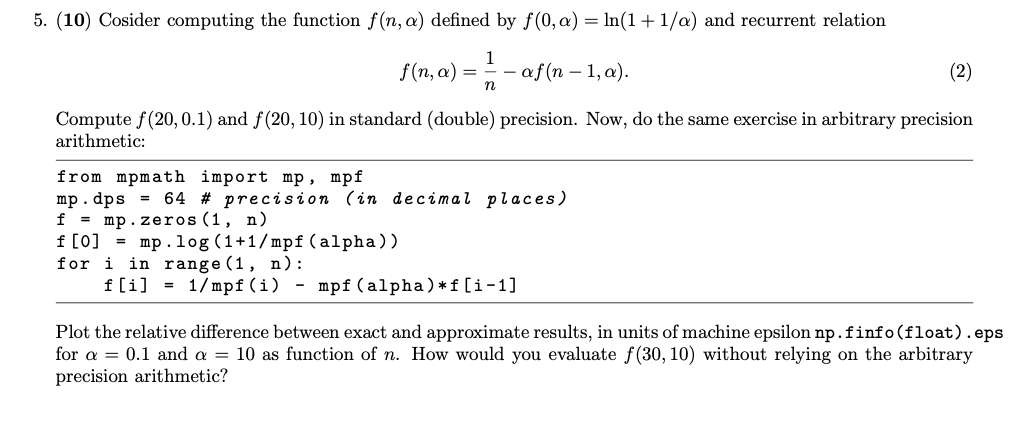

In [98]:
import numpy as np
import matplotlib.pyplot as plt
mp.dps = 64

def f_mpf(n, alpha):
    f = mp.zeros(1, n + 1)
    f[0] = mp.log(1 + 1 / mpf(alpha))
    for i in range(1, n + 1):
        f[i] = 1 / mpf(i) - mpf(alpha) * f[i - 1]

    return f

def f_dt(dtype, n, alpha):
    f = np.zeros(n + 1, dtype=dtype)
    f[0] = np.log(1 + 1 / np.array(alpha, dtype=dtype))
    for i in range(1, n + 1):
        f[i] = 1 / np.array(i, dtype=dtype) - np.array(alpha, dtype=dtype) * f[i - 1]

    return f

def compare(dtype, n, alpha):
    diff = f_mpf(n, alpha) - f_dt(dtype, n, alpha)
    diff /= np.finfo(dtype).eps

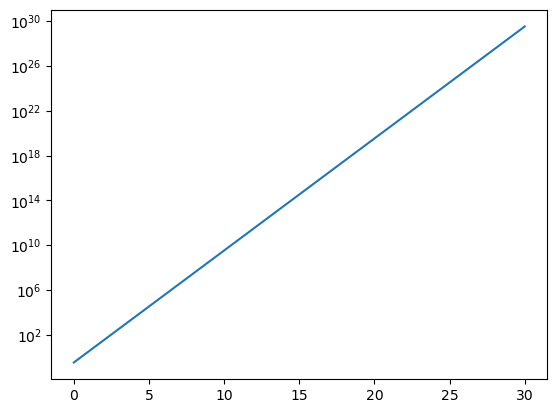

In [107]:
diff = f_dt(np.float64, 30, 10) - f_mpf(30, 10)
diff /= np.finfo(np.float64).eps
import matplotlib.pyplot as plt
#plt.plot(diff)
plt.yscale('log')
plt.plot(np.abs(diff))

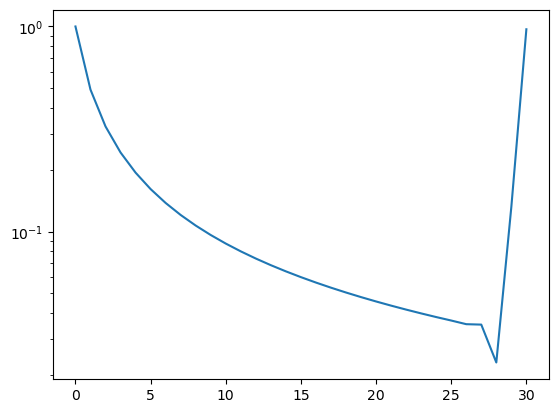

In [102]:
def normalize(x):
    return x / np.max(np.abs(x))

diff_normalized = normalize(f_dt(np.float64, 30, 10)) - normalize(f_mpf(30, 10))
plt.yscale('log')
plt.plot(np.abs(diff_normalized))

/var/folders/cc/1_x4zmms2ps309zhpw3kc7940000gn/T/ipykernel_50089/2780939016.py:5: RuntimeWarning: invalid value encountered in log
  result[i] = np.log(1 / i - alpha * np.exp(result[i - 1]))


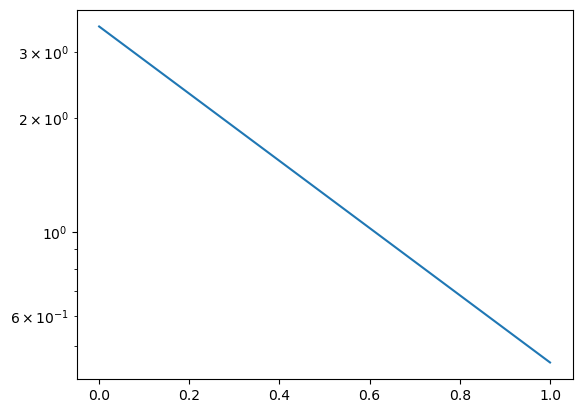

In [105]:
def g(n, alpha):
    result = np.zeros(n + 1)
    result[0] = np.log(1 / n)
    for i in range(1, n + 1):
        result[i] = np.log(1 / i - alpha * np.exp(result[i - 1]))
    return result

diff_stabilized = g(30, 10) - f_dt(np.float64, 30, 10)
plt.yscale('log')
plt.plot(np.abs(diff_stabilized))


# Task 6 
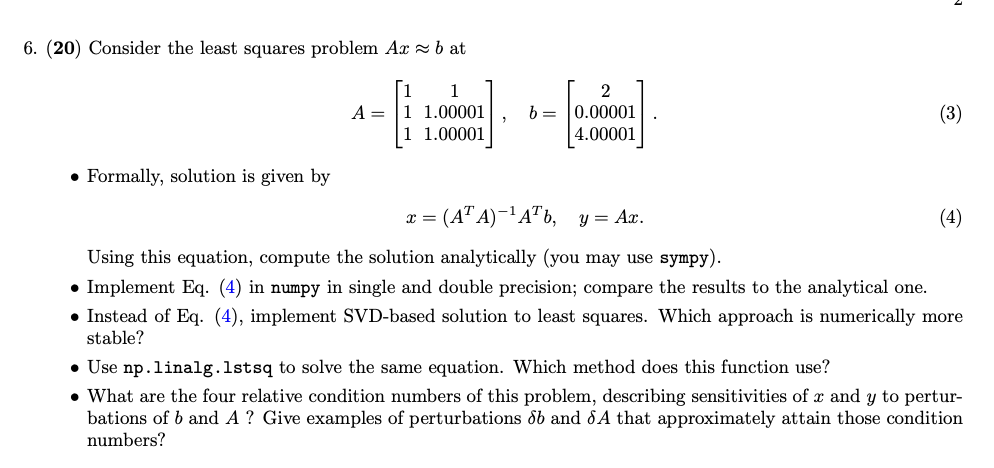

In [122]:
import sympy as sp

eps = sp.Symbol('\\epsilon')
A = sp.Matrix([ [ 1, 1 ], [ 1, 1 + eps ], [ 1, 1 + eps ] ])
b = sp.Matrix([ [ 2 ], [ eps ], [ 4 + eps ] ])

x_sol = (A.transpose() * A).inv() * A.transpose() * b
x_sol = sp.simplify(x_sol)
y_sol = A * x_sol
print(x_sol)
print(y_sol)

Matrix([[1], [1]])
Matrix([[2], [\epsilon + 2], [\epsilon + 2]])


In [137]:
import numpy as np
import sympy as sp

A = np.array([[1, 1], [1, 1.00001], [1, 1.00001]])
b = np.array([2, 0.00001, 4.00001])

A_single = np.array(A, dtype=np.float32)
b_single = np.array(b, dtype=np.float32)

x_single = np.linalg.inv(A_single.T @ A_single) @ A_single.T @ b_single
y_single = np.dot(A_single, x_single)

A_double = np.array(A, dtype=np.float64)
b_double = np.array(b, dtype=np.float64)

x_double = np.linalg.inv(A_double.T @ A_double) @ A_double.T @ b_double
y_double = np.dot(A_double, x_double)

print("Single:", x_single)
print(y_single)
print("Double:", x_double)
print(y_double)


delta_b = np.array([0.002, 0.001, 0.003])
delta_A = np.array([[0.002, 0], [0.001, 0.001], [0, 0.001]])
sensitivity_x_b = np.linalg.norm(x_single) / np.linalg.norm(delta_b)
sensitivity_x_A = np.linalg.norm(x_single) / np.linalg.norm(delta_A)
sensitivity_y_b = np.linalg.norm(y_single) / np.linalg.norm(delta_b)
sensitivity_y_A = np.linalg.norm(y_single) / np.linalg.norm(delta_A)
print("Sensitivity of x to perturbations in b (single):", sensitivity_x_b)
print("Sensitivity of x to perturbations in A (single):", sensitivity_x_A)
print("Sensitivity of y to perturbations in b (single):", sensitivity_y_b)
print("Sensitivity of y to perturbations in A (single):", sensitivity_y_A)


sensitivity_x_b = np.linalg.norm(x_double) / np.linalg.norm(delta_b)
sensitivity_x_A = np.linalg.norm(x_double) / np.linalg.norm(delta_A)
sensitivity_y_b = np.linalg.norm(y_double) / np.linalg.norm(delta_b)
sensitivity_y_A = np.linalg.norm(y_double) / np.linalg.norm(delta_A)
print("Sensitivity of x to perturbations in b (double):", sensitivity_x_b)
print("Sensitivity of x to perturbations in A (double):", sensitivity_x_A)
print("Sensitivity of y to perturbations in b (double):", sensitivity_y_b)
print("Sensitivity of y to perturbations in A (double):", sensitivity_y_A)

Single: [1612.159 1461.854]
[3074.013 3074.028 3074.028]
Double: [1. 1.]
[2. 2. 2.]
Sensitivity of x to perturbations in b (single): 581627.8649558533
Sensitivity of x to perturbations in A (single): 822546.0148746748
Sensitivity of y to perturbations in b (single): 1422996.0734384393
Sensitivity of y to perturbations in A (single): 2012420.3462603018
Sensitivity of x to perturbations in b (double): 377.965148752314
Sensitivity of x to perturbations in A (double): 534.5234394698869
Sensitivity of y to perturbations in b (double): 925.8248410586958
Sensitivity of y to perturbations in A (double): 1309.314046607123


In [147]:
import numpy as np

A = np.array([[1, 1], [1, 1.00001], [1, 1.00001]])
b = np.array([2, 0.00001, 4.00001])

delta_b = np.array([0.002, 0.001, 0.003])
delta_A = np.array([[0.002, 0], [0.001, 0.001], [0, 0.001]])

U, S, Vt = np.linalg.svd(A, full_matrices=False)
x_svd = np.dot(Vt.T, np.dot(np.diag(1/S), np.dot(U.T, b)))
print("x_svd:", x_svd)

y_svd = np.dot(A, x_svd)
print("y_svd:", y_svd)



x_sol = np.linalg.lstsq(A, b, rcond=None)[0]
y_sol = np.dot(A, x_sol)
print("x_sol:", x_sol)
print("y_sol:", y_sol)

sensitivity_x_b = np.linalg.norm(x_sol) / np.linalg.norm(delta_b)
sensitivity_x_A = np.linalg.norm(x_sol) / np.linalg.norm(delta_A)
sensitivity_y_b = np.linalg.norm(y_sol) / np.linalg.norm(delta_b)
sensitivity_y_A = np.linalg.norm(y_sol) / np.linalg.norm(delta_A)
print("Sensitivity of x to perturbations in b (double):", sensitivity_x_b)
print("Sensitivity of x to perturbations in A (double):", sensitivity_x_A)
print("Sensitivity of y to perturbations in b (double):", sensitivity_y_b)
print("Sensitivity of y to perturbations in A (double):", sensitivity_y_A)

x_svd: [1. 1.]
y_svd: [2. 2. 2.]
0.9992006107588199
x_sol: [1. 1.]
y_sol: [2. 2. 2.]
Sensitivity of x to perturbations in b (double): 377.9644730092274
Sensitivity of x to perturbations in A (double): 534.522483824849
Sensitivity of y to perturbations in b (double): 925.8231858421227
Sensitivity of y to perturbations in A (double): 1309.3117057773964


The method np.linalg.lstsq involves singular value decomposition (SVD). It decomposes the coefficient matrix 
A into three matrices U, S, $V^T$ ==> $A=U \cdot S \cdot V^T$. The SVD is generally stable

# Task 7
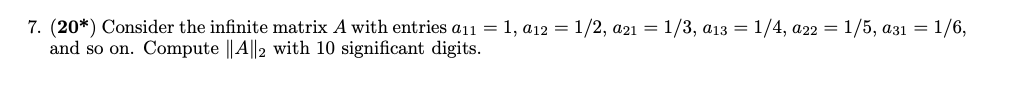